In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

In [2]:
torch.manual_seed(121212)
np.random.seed(121212)
#torch.manual_seed(334421)
#np.random.seed(334421)

### Data Generating

In [3]:
n_features = 2
n_classes = 2
n_samples_per_class = 100

In [4]:
from sklearn.datasets import make_classification
features_orig_1, labels_orig_1 = make_classification(
    n_samples=n_samples_per_class*n_classes//2,
    n_informative=n_features,
    n_features=4,
    flip_y=0.,
    shuffle=False,
    shift=-0.3,
    random_state=121212
)

In [5]:
from sklearn.datasets import make_classification
features_orig_2, labels_orig_2 = make_classification(
    n_samples=n_samples_per_class*n_classes//2,
    n_informative=n_features,
    n_features=4,
    flip_y=0.,
    shuffle=False,
    shift=+0.3,
    random_state=121212
)

In [6]:
features_orig = np.concatenate((features_orig_1, features_orig_2))
labels_orig = np.concatenate((labels_orig_1, labels_orig_2))

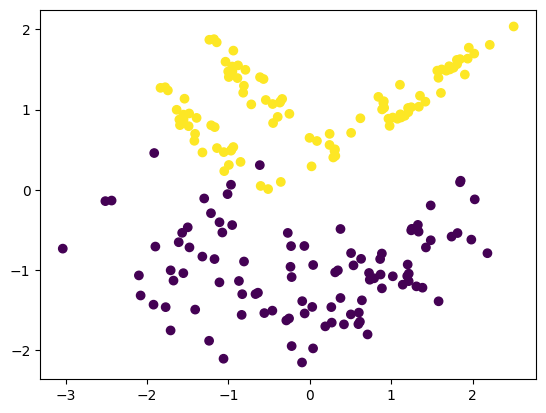

In [7]:
plt.scatter(
    features_orig[:,0], features_orig[:,1], c=labels_orig
)

## Functions

### 1

In [8]:
def warp1(a):
    x = a[:, 0]
    y = a[:, 1]
    out1 = np.sin(x**2 - y)
    out2 = np.exp(-x*y/10.) + np.sqrt(np.abs(y))  # Use absolute value to avoid negative square roots
    out3 = (np.log(1 + x**2 - y**2) + 10*x*y - y)/100.
    
    # Replace NaN values with zeros
    out1 = np.nan_to_num(out1)
    out2 = np.nan_to_num(out2)
    out3 = np.nan_to_num(out3)
    
    return np.stack((out1, out2, out3), axis=-1)

def warp2(a):
    x = a[:, 0]
    y = a[:, 1]
    out1 = np.cos(x + y) + np.sin(x**y)
    out2 = x**2 - np.exp(-np.abs(y)/10.) + np.sin(x)  # Use absolute value to avoid negative exponents
    out3 = (np.log(np.abs(x * y) + 1) + np.cos(10*x*y - x))/100. 
    
    out1 = np.nan_to_num(out1)
    out2 = np.nan_to_num(out2)
    out3 = np.nan_to_num(out3)
    
    return np.stack((out1, out2, out3), axis=-1)

### 2

In [41]:
def warp1(a):
    x = a[:, 0]
    y = a[:, 1]
    out1 = np.sin(x) * np.cos(y)
    out2 = np.exp(-x**2 - y**2)
    out3 = np.sqrt(np.abs(x**2 + np.cos(y**2)))  # Take absolute value before taking square root
    return np.stack((out1, out2, out3), axis=-1)

def warp2(a):
    x = a[:, 0]
    y = a[:, 1]
    out1 = np.tan(x) * np.sin(y)
    out2 = np.exp(-x*y)
    out3 = np.log(np.abs(x + y + 1))  # Take absolute value before taking logarithm
    return np.stack((out1, out2, out3), axis=-1)


## Complex Functions

### 1

In [55]:
def warp1(a):
    x = a[:,0]
    y = a[:,1]
    out1 = x**2 * y
    out2 = np.exp(-x*y/10.)
    out3 = (np.log(x**2 + y**2) + 10*x*y - y)/100.
    return np.stack((out1, out2, out3), axis=-1)

def warp2(a):
    x = a[:,0]
    y = a[:,1]
    out1 = np.cos(x**3 - y**3)
    out2 = np.exp(-x**2*y/10.) - np.log(x**2 + y**2 + 1)
    out3 = (np.log(1 + x**2 * y**2) + 10*np.sin(x*y) - np.sqrt(np.abs(x - y)))/100.
    return np.stack((out1, out2, out3), axis=-1)

### 2

In [49]:
import numpy as np

def warp1(a):
    x = a[:,0]
    y = a[:,1]
    out1 = np.sin(x**3 * y)
    out2 = np.exp(-x*y**2/10.) + np.log(x**2 + y**3 + 1)
    out3 = (np.log(1 + x**2 * y**2) + 10*np.cos(x*y) - np.sqrt(np.abs(x - y)))/100.
    
    # Replace NaN values with zeros
    out1 = np.nan_to_num(out1)
    out2 = np.nan_to_num(out2)
    out3 = np.nan_to_num(out3)
    
    return np.stack((out1, out2, out3), axis=-1)

def warp2(a):
    x = a[:,0]
    y = a[:,1]
    out1 = x**y
    r = np.sqrt(x**2 + y**2)
    z = np.sqrt(np.maximum(r**2 - x**2 - y**2, 0))  # Ensure non-negative argument for sqrt
    
    out1 = np.nan_to_num(out1)
    r = np.nan_to_num(r)
    z = np.nan_to_num(z)
    return np.stack((out1, r, z), axis=-1)


## Idea MARCO

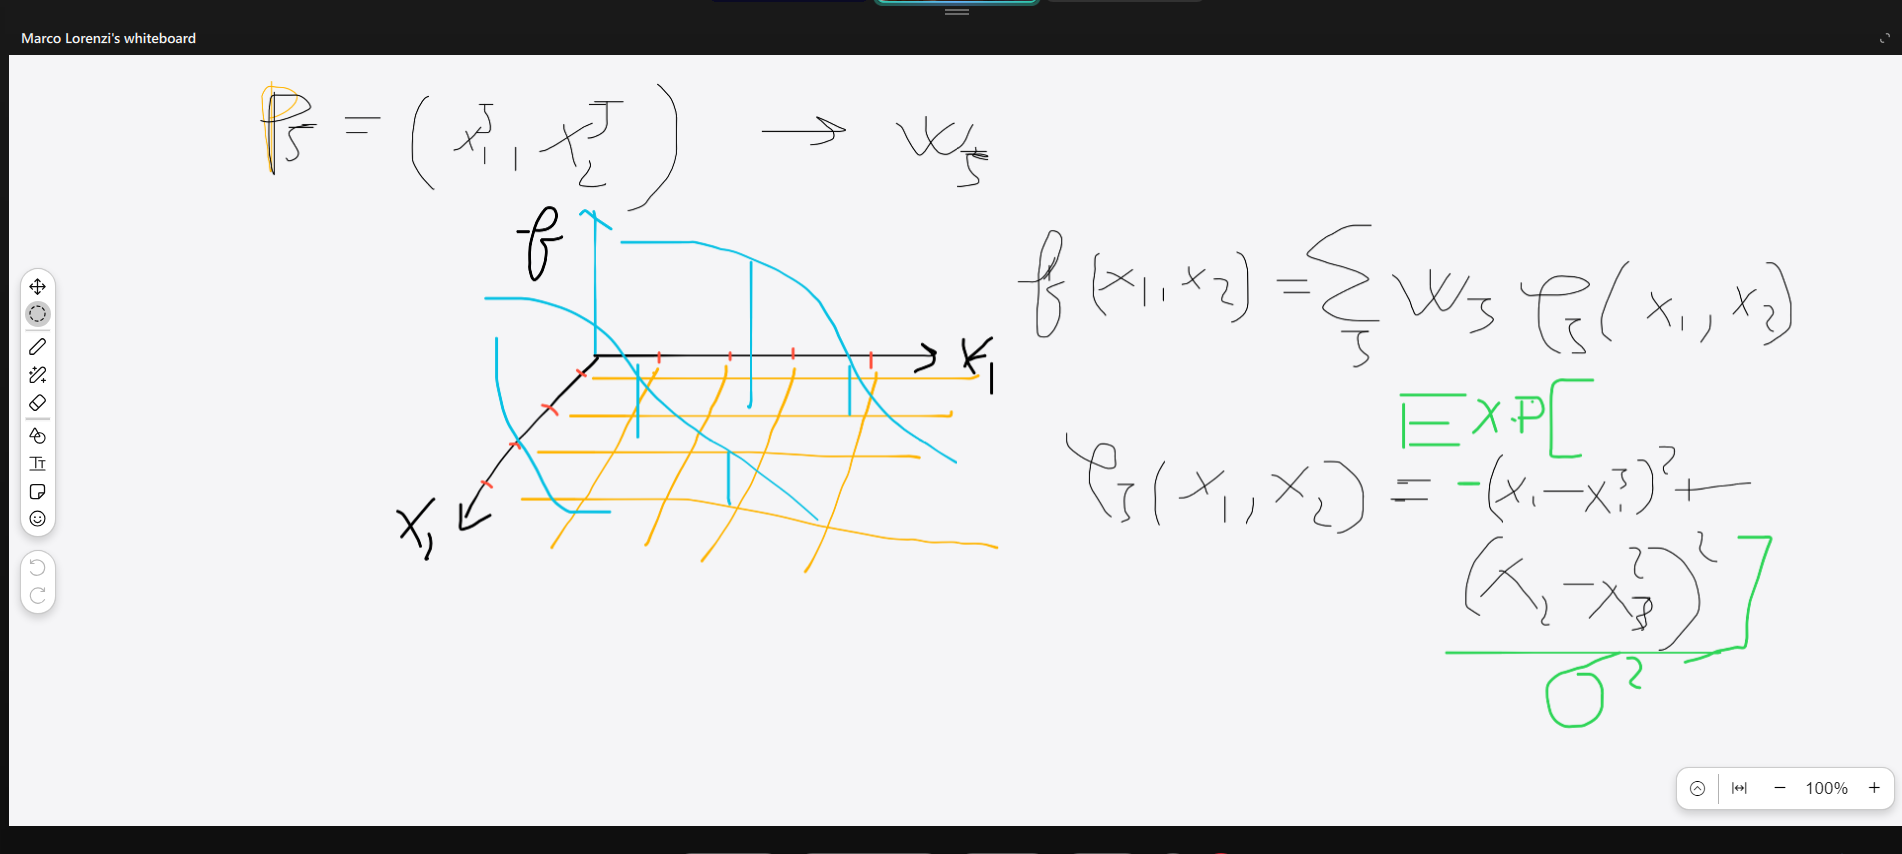

In [8]:
num_samples = 2000
num_features = 4

# Generate random weights for each sample and feature
weights = np.random.uniform(low=-1, high=1, size=4)
weights.shape

(4,)

In [15]:
def warp1(xi, xl, W, sigma):
    n = len(xi)
    m = len(xl)
    f_values = np.zeros((n,m))
    values = []
    
    for i in range(n):
        for j in range(m):
            kernel_value = karnelj(xi[i], xl[j], sigma)
            f_values[i, j] = np.dot(W, kernel_value)
        
        values.append(sum(f_values[i,:]))
    print(np.array(values).shape)
    
    out1 = values
    out2 = values[::-1]
    out3 = np.array(values)**2
    
    return np.stack((out1, out2, out3), axis=-1)

def karnelj(xi, xl, sigma):
    return np.exp(-((xi - xl**3)**2 + (xl - xi**2)**2)) / sigma


In [24]:
def warp2(xi, xl, W, sigma):
    n = len(xi)
    m = len(xl)
    f_values = np.zeros((n,m))
    values = []
    
    for i in range(n):
        for j in range(m):
            kernel_value = karnelj(xi[i], xl[j], sigma)
            f_values[i, j] = np.dot(W, kernel_value)
        
        values.append(sum(f_values[i,:]))
    
    out1 = np.array(values)**2 + np.cos(np.array(values))
    out2 = np.cos(np.array(values[::-1])) + np.exp(np.array(values[::-1]))
    out3 = np.array(values)**2
    
    return np.stack((out1, out2, out3), axis=-1)

def karnelj(xi, xl, sigma):
    return np.exp(-((xi - xl**3)**2 + (xl - xi**2)**2)) / sigma


In [25]:
# Calculate the standard deviation of each feature
sigma = np.std(features_orig, axis=0)

warped_features_1 = warp1(features_orig[:,0], features_orig[:,1], weights, sigma)
warped_features_2 = warp2(features_orig[:,0], features_orig[:,1], weights, sigma)

### Features

In [50]:
warped_features_1 = warp1(features_orig)
warped_features_2 = warp2(features_orig)

C:\Users\Raffaele\AppData\Local\Temp\ipykernel_12392\3775268192.py:7: RuntimeWarning: invalid value encountered in log
  out2 = np.exp(-x*y**2/10.) + np.log(x**2 + y**3 + 1)
C:\Users\Raffaele\AppData\Local\Temp\ipykernel_12392\3775268192.py:20: RuntimeWarning: invalid value encountered in power
  out1 = x**y


In [21]:
warped_features_2

array([[ 1.00000000e+00,  9.99999999e-01,  1.04972998e-09],
       [ 2.21180611e+00,  1.00000000e+00,  2.08546084e+00],
       [ 2.86667870e+00, -5.39297600e-01,  3.03802605e+00],
       [ 1.00000000e+00, -8.50173030e-01,  2.14415632e-32],
       [ 1.00000311e+00,  4.71712165e-01,  6.22378204e-06],
       [ 1.00000000e+00,  9.99669056e-01,  3.28702998e-15],
       [ 1.00000025e+00,  8.96889008e-01,  4.91320434e-07],
       [ 1.85939129e+03,  9.87027333e-01,  1.85874580e+03],
       [ 2.56550514e+01,  1.19326936e-01,  2.53391455e+01],
       [ 1.00000000e+00,  5.60351749e-01,  2.16639678e-70],
       [ 5.55386350e+02,  3.02324797e-01,  5.55381756e+02],
       [ 1.00011954e+00,  9.62157386e-01,  2.39069587e-04],
       [ 1.58788626e+02,  5.60050620e-02,  1.57788639e+02],
       [ 1.71514857e+03,  8.77237449e-01,  1.71598299e+03],
       [ 2.12631596e+02,  6.38015789e-01,  2.13075489e+02],
       [ 1.59743890e+03,  9.99440715e-01,  1.59808783e+03],
       [ 1.00000321e+00,  8.06493585e-01

### View dataset per client 1

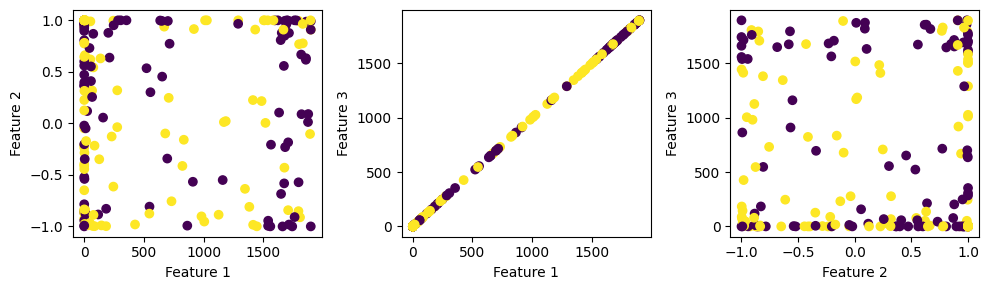

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Scatter plot for the first subplot
scatter1 = ax[0].scatter(warped_features_1[:,0], warped_features_1[:,1], c=labels_orig)
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')

# Scatter plot for the second subplot
scatter2 = ax[1].scatter(warped_features_1[:,0], warped_features_1[:,2], c=labels_orig)
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 3')

# Scatter plot for the third subplot
scatter3 = ax[2].scatter(warped_features_1[:,1], warped_features_1[:,2], c=labels_orig)
ax[2].set_xlabel('Feature 2')
ax[2].set_ylabel('Feature 3')

# Show the plot
plt.tight_layout()
plt.show()

### View dataset per client 2

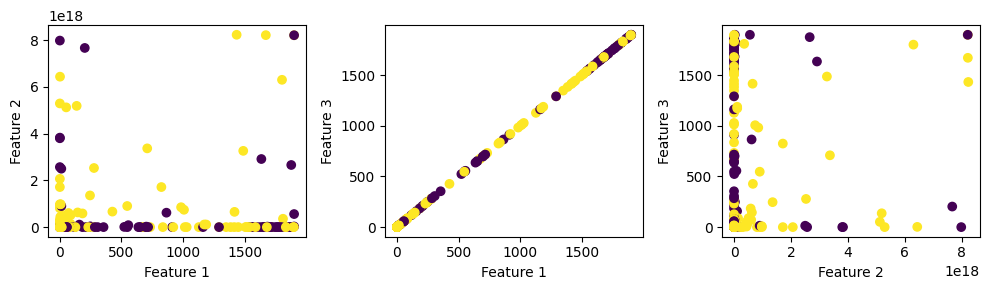

In [26]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Scatter plot for the first subplot
scatter1 = ax[0].scatter(warped_features_2[:,0], warped_features_2[:,1], c=labels_orig)
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')

# Scatter plot for the second subplot
scatter2 = ax[1].scatter(warped_features_2[:,0], warped_features_2[:,2], c=labels_orig)
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 3')

# Scatter plot for the third subplot
scatter3 = ax[2].scatter(warped_features_2[:,1], warped_features_2[:,2], c=labels_orig)
ax[2].set_xlabel('Feature 2')
ax[2].set_ylabel('Feature 3')

# Show the plot
plt.tight_layout()
plt.show()

### Clients

In [27]:
class Client1(nn.Module):
    def __init__(self):
        super(Client1, self).__init__()
         
        self.num_samples = 10
        
        
        

        self.encoder_model = nn.Sequential(nn.Linear(3, 20, dtype=torch.float64),
                                           nn.ReLU(),
                                           nn.Linear(20, 10, dtype=torch.float64),
                                           nn.ReLU()
                                    )


                            
        
        self.decoder_model = nn.Sequential(nn.Linear(10, 8, dtype=torch.float64),
                                           nn.ReLU(),
                                           nn.Linear(8, 5, dtype=torch.float64),
                                           nn.ReLU(),
                                           nn.Linear(5, 3, dtype=torch.float64),
                                           nn.Softmax(dim=1))
        
        self.optimizer = optim.Adam(self.parameters(), lr=0.001)
        self.loss_function = nn.CrossEntropyLoss()

    def forward(self, inputs):
        outputs_encoder = self.encoder_model(inputs)
        outputs_class = self.decoder_model(outputs_encoder)
        latent_parameters = list(self.decoder_model.parameters())
        return outputs_class, latent_parameters


    def update(self, latent_parameters):
        # Get the parameters of the latent model
        latent_params = self.decoder_model.parameters()
    
        # Iterate over the parameters and update them with new values
        for param, new_value in zip(latent_params, latent_parameters):
            param.data.copy_(new_value)
    
    def train_step(self, inputs, labels):
        
        #Forward pass
        logits, latent_parameters = self.forward(inputs)

        #Compute the loss
        labels = labels.long()
        loss = self.loss_function(logits, labels)

        #Zero the gradients
        self.optimizer.zero_grad()

        #Backward pass
        loss.backward()

        #updare the parameters
        self.optimizer.step()

        return loss.item(), latent_parameters

In [28]:
class Client2(nn.Module):
    def __init__(self):
        super(Client2, self).__init__()

        
        
        
        

        self.encoder_model = nn.Sequential(nn.Linear(3, 20, dtype=torch.float64),
                                           nn.ReLU(),
                                           nn.Linear(20, 10, dtype=torch.float64),
                                           nn.ReLU()
                                    )


                            
        
        self.decoder_model = nn.Sequential(nn.Linear(10, 8, dtype=torch.float64),
                                           nn.ReLU(),
                                           nn.Linear(8, 5, dtype=torch.float64),
                                           nn.ReLU(),
                                           nn.Linear(5, 3, dtype=torch.float64),
                                           nn.Softmax(dim=1))
        
        self.optimizer = optim.Adam(self.parameters(), lr=0.001)
        self.loss_function = nn.CrossEntropyLoss()

    def forward(self, inputs):
        outputs_encoder = self.encoder_model(inputs)
        outputs_class = self.decoder_model(outputs_encoder)
        latent_parameters = list(self.decoder_model.parameters())
        return outputs_class, latent_parameters


    def update(self, latent_parameters):
        # Get the parameters of the latent model
        latent_params = self.decoder_model.parameters()
    
        # Iterate over the parameters and update them with new values
        for param, new_value in zip(latent_params, latent_parameters):
            param.data.copy_(new_value)
    
    def train_step(self, inputs, labels):
        
        #Forward pass
        logits, latent_parameters = self.forward(inputs)

        #Compute the loss
        labels = labels.long()
        loss = self.loss_function(logits, labels)

        #Zero the gradients
        self.optimizer.zero_grad()

        #Backward pass
        loss.backward()

        #updare the parameters
        self.optimizer.step()

        return loss.item(), latent_parameters

### Praparing the data

In [29]:
X_train_C1, X_test_C1, y_train_C1, y_test_C1 = train_test_split(torch.tensor(warped_features_1), torch.tensor(labels_orig), test_size=0.2, random_state=42)
X_train_C2, X_test_C2, y_train_C2, y_test_C2 = train_test_split(torch.tensor(warped_features_2), torch.tensor(labels_orig), test_size=0.2, random_state=42)

In [30]:
X_train_all_C1 = torch.utils.data.TensorDataset(torch.tensor(np.vstack(X_train_C1)), torch.tensor(np.hstack(y_train_C1)))
X_test_all_C1 = torch.utils.data.TensorDataset(torch.tensor(np.vstack(X_test_C1)), torch.tensor(np.hstack(y_test_C1)))

In [31]:
X_train_all_C2 = torch.utils.data.TensorDataset(torch.tensor(np.vstack(X_train_C2)), torch.tensor(np.hstack(y_train_C2)))
X_test_all_C2 = torch.utils.data.TensorDataset(torch.tensor(np.vstack(X_test_C2)), torch.tensor(np.hstack(y_test_C2)))

In [32]:
trainloader_C1= torch.utils.data.DataLoader(X_train_all_C1, batch_size=64, shuffle=True, num_workers=2)
testloader_C1 = torch.utils.data.DataLoader(X_test_all_C1, batch_size=64, shuffle=False, num_workers=2)

In [33]:
trainloader_C2 = torch.utils.data.DataLoader(X_train_all_C2, batch_size=64, shuffle=True, num_workers=2)
testloader_C2 = torch.utils.data.DataLoader(X_test_all_C2, batch_size=64, shuffle=False, num_workers=2)

## Training

In [ ]:
client1 = Client1()
client2 = Client2()


num_epochs = 200
latent_parameters = []
losses_1 = []
losses_2 = []


#training loop
for epoch in range(num_epochs):
    
    client1.train()
    client2.train()
    epoch_loss_1 = 0.0
    epoch_loss_2 = 0.0
    
    for  i, ((x_c1, y_c1), (x_c2, y_c2)) in enumerate(zip(trainloader_C1, trainloader_C2)): 
        x_c1 = torch.tensor(x_c1)
        y_c1 = torch.tensor(y_c1, dtype=torch.long)
        x_c2 = torch.tensor(x_c2)
        y_c2 = torch.tensor(y_c2, dtype=torch.long)
        loss_1, latent_parameters_1 = client1.train_step(x_c1, y_c1)
        loss_2, latent_parameters_2 = client2.train_step(x_c2, y_c2)
        
        epoch_loss_1 += loss_1  # Accumulate losses
        epoch_loss_2 += loss_2
        
    epoch_loss_1 /= len(trainloader_C1)  # Average losses
    epoch_loss_2 /= len(trainloader_C2)
    
    losses_1.append(epoch_loss_1)  # Append to the list of losses
    losses_2.append(epoch_loss_2)
        
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss_1:.4f}")
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss_2:.4f}")
    if ((epoch+1) % 2 == 0):
        print(epoch+1)
        latent_parameters =[(x + y) / 2 for x, y in zip(latent_parameters_1, latent_parameters_2)]
        client1.update(latent_parameters)
        client2.update(latent_parameters)
    
    latent_parameters = []

# Plotting the losses
plt.plot(losses_1, label='Client 1 Loss')
plt.plot(losses_2, label='Client 2 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Losses')
plt.legend()
plt.show()

C:\Users\Raffaele\AppData\Local\Temp\ipykernel_3776\2986996705.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_c1 = torch.tensor(x_c1)
C:\Users\Raffaele\AppData\Local\Temp\ipykernel_3776\2986996705.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_c1 = torch.tensor(y_c1, dtype=torch.long)
C:\Users\Raffaele\AppData\Local\Temp\ipykernel_3776\2986996705.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_c2 = torch.tensor(x_c2)
C:\Users\Raffaele\AppData\Local\Temp\ipykernel_3776\2986996705.py:23: UserWarning: To copy construct

Epoch [1/200], Loss: 1.2569
Epoch [1/200], Loss: 1.2034
Epoch [2/200], Loss: 1.2872
Epoch [2/200], Loss: 1.0453
2
Epoch [3/200], Loss: 1.0167
Epoch [3/200], Loss: 1.4283
Epoch [4/200], Loss: 1.0438
Epoch [4/200], Loss: 1.3866
4
Epoch [5/200], Loss: 1.0182
Epoch [5/200], Loss: 1.0366
Epoch [6/200], Loss: 1.0074
Epoch [6/200], Loss: 1.1550
6
Epoch [7/200], Loss: 1.0415
Epoch [7/200], Loss: 1.2622
Epoch [8/200], Loss: 1.0319
Epoch [8/200], Loss: 1.0801
8
Epoch [9/200], Loss: 1.0746
Epoch [9/200], Loss: 1.0684
Epoch [10/200], Loss: 1.0109
Epoch [10/200], Loss: 1.1202
10
Epoch [11/200], Loss: 1.0406
Epoch [11/200], Loss: 1.0910
Epoch [12/200], Loss: 1.0223
Epoch [12/200], Loss: 1.1412
12
Epoch [13/200], Loss: 1.0265
Epoch [13/200], Loss: 1.0591
Epoch [14/200], Loss: 1.0280
Epoch [14/200], Loss: 0.9522
14
Epoch [15/200], Loss: 1.0174
Epoch [15/200], Loss: 1.0825
Epoch [16/200], Loss: 1.0323
Epoch [16/200], Loss: 1.1326
16
Epoch [17/200], Loss: 1.0224
Epoch [17/200], Loss: 1.0673
Epoch [18/20

In [ ]:
total_accuracy_1 = 0.0
total_samples_1 = 0
total_accuracy_2 = 0.0
total_samples_2 = 0

for i, ((x_c1, y_c1), (x_c2, y_c2)) in enumerate(zip(testloader_C1, testloader_C2)):
    logits_1, _ = client1.forward(x_c1)
    logits_2, _ = client2.forward(x_c2)
        

    _, predictions_1 = torch.max(logits_1, 1)
    _, predictions_2 = torch.max(logits_2, 1)
        
    acc_1 = torch.mean((predictions_1 == y_c1).float())
    acc_2 = torch.mean((predictions_2 == y_c2).float())
    
    total_accuracy_1 += acc_1.item() * x_c1.size(0)
    total_samples_1 += x_c1.size(0)
    total_accuracy_2 += acc_2.item() * x_c2.size(0)
    total_samples_2 += x_c2.size(0)

final_accuracy_1 = total_accuracy_1 / total_samples_1
final_accuracy_2 = total_accuracy_2 / total_samples_2
print(f"Accuracy on test set: {final_accuracy_1 * 100:.2f}%")
print(f"Accuracy on test set: {final_accuracy_2 * 100:.2f}%")